# BM 336546 - HW2: Type 1 Diabetes (T1D)
Our goal is to predict if a patient suffers from T1D, by applying ML algorithms on the given dataset. 
# Part I: Data exploration


### 1) Loading the data

Let's start the assignment by loading the data and explain any preprocessing

Loading the data:

In [2]:
import pandas as pd 
import numpy as np
from pathlib import Path
import random
%reload_ext autoreload

file = Path.cwd().joinpath('HW2_data.csv') # concatenates HW2_data.csv to the current folder
T1D_dataset = pd.read_csv(file) # load the data

random.seed(10)  # fill your seed number here
print('hello')

hello


Now we can apply some preprocessing. We decided to fill the empty cells (nan) with random values from each column.

In [3]:
from helpers_function import nan2rand_val as rv

filled_dataset = rv(T1D_dataset)

### 2) Splitting the data


Now we will split our dataset into a train (80%) and test (20%) sets, using the sklearn function. We would like our sets to represent equally the classes (diagnosis yes or no) of the patients, therefore we will use the stratify method with the diagnosis column.

In [4]:
from sklearn.model_selection import train_test_split
X = filled_dataset.loc[:, 'Age':'Obesity']
X['Family History']=filled_dataset[['Family History']]
list_features = list(X.columns.values)
Y = T1D_dataset[['Diagnosis']]
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,stratify=Y)

### 3) Visualizating the data

#### a. Repartition in test/train
First, let's plot a table showing the repartition of positive features (as the features have a binary result) in each set (train and test)

In [5]:
import matplotlib.pyplot as plt
fts = ['Muscle Stiffness', 'Hair Loss', 'Obesity', 'Partial Paresis', 'Delayed Healing']

partition_ft = pd.DataFrame(columns=['Positive Feature','% in train','% in test','difference'])

partition_ft['Positive Feature'] = fts
train_lst = []
test_lst = []
for ft in fts:
    pos_ft_train = np.sum(X_train[[ft]]=='Yes')
    train_lst.append(100*pos_ft_train/len(X_train[[ft]]))
    pos_ft_test = np.sum(X_test[[ft]]=='Yes')
    test_lst.append(100*pos_ft_test/len(X_test[[ft]]))
partition_ft[['% in train']] = train_lst
partition_ft[['% in test']] = test_lst
partition_ft[['difference']] = np.array(train_lst) - np.array(test_lst)
print(partition_ft)


   Positive Feature % in train % in test difference
0  Muscle Stiffness    38.7168   30.0885    8.62832
1         Hair Loss    35.8407   35.3982   0.442478
2           Obesity    18.5841   9.73451    8.84956
3   Partial Paresis    43.3628    39.823    3.53982
4   Delayed Healing    47.3451   41.5929    5.75221


As we can notice, the difference between the percentage of positive features in the train and in the test set is lower than 10% (in absolute value). Hence, we can conclude that the data is distributed similarly in both sets (train and test).

An imbalance of features between train and test sets could cause a bad interpretation of the dataset; if in the train set, we have a lot more positive values ('Yes') for a specific feature, the model trained on it will be fitted accordingly (will be very accurate for that positive feature), but not taking in consideration the negative values ('No'), that we will surely interpret wrongly in the test set.

In order to solve such an issue, we can for example split the dataset using stratification (meaning taking in consideration the ratios for specific features).#more data

#### b. Relationship between features and label

We will now plot the relationship between features and label:

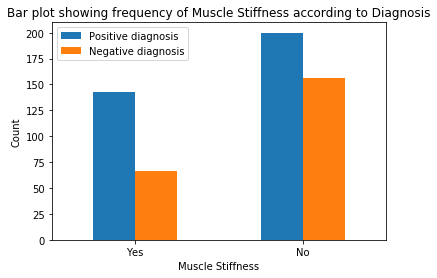

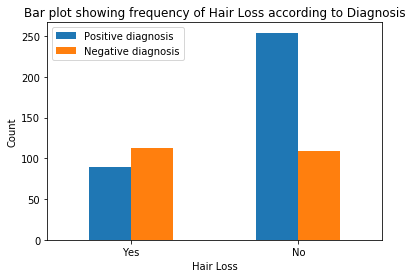

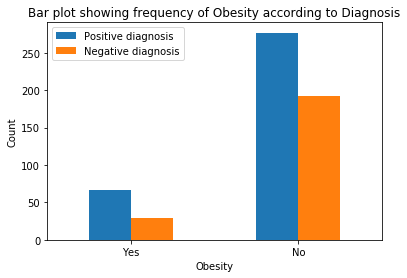

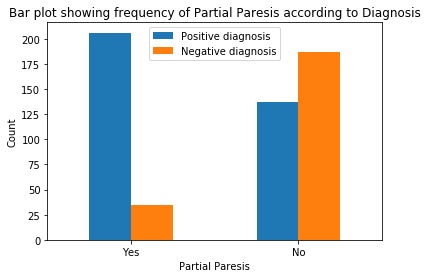

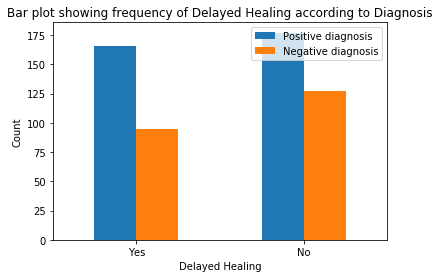

In [6]:
for ft in fts:
    DiagYesFt = filled_dataset[ft].loc[filled_dataset['Diagnosis'] == 'Positive']
    DiagYesFtYes = np.sum(DiagYesFt == 'Yes')
    DiagYesFtNo = np.sum(DiagYesFt == 'No')

    DiagNoFt = filled_dataset[ft].loc[filled_dataset['Diagnosis'] == 'Negative']
    DiagNoFtYes = np.sum(DiagNoFt == 'Yes')
    DiagNoFtNo = np.sum(DiagNoFt == 'No')
    DiagYes = [DiagYesFtYes, DiagYesFtNo]
    DiagNo = [DiagNoFtYes, DiagNoFtNo]
    index = ['Yes','No']
    df = pd.DataFrame({'Positive diagnosis': DiagYes,
                       'Negative diagnosis': DiagNo}, index=index)
    ax = df.plot.bar(rot=0)
    ax.set_xlabel(ft)
    ax.set_ylabel('Count')
    ax.set_title(f'Bar plot showing frequency of {ft} according to Diagnosis')
    

### 4) Encoding the data as one hot vectors 

We will now transform the dataset into one hot vectors:

In [7]:
from helpers_function import to_one_hot as one_hot
'''
bin_Xtrain = one_hot(X_train)
bin_Xtest = one_hot(X_test)
bin_ytrain = one_hot(y_train)
bin_ytest = one_hot(y_test)
'''
bin_Xtrain = pd.get_dummies(X_train)
bin_Xtest = pd.get_dummies(X_test)
bin_ytrain = pd.get_dummies(y_train)
bin_ytest = pd.get_dummies(y_test)

### 5) Machine learning application

#### a. 5K cross fold validation

Let's start by doing a 5K cross fold validation

In [8]:
from sklearn.model_selection import StratifiedKFold as SKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score
import warnings
from helpers_function import tune_LinReg

kf = SKFold(n_splits=5)

print(tune_LinReg(kf, bin_Xtrain, bin_ytrain))


here
{'C': 10.0, 'penalty': 'l1', 'auc_score': 0.9807792207792209}


That's all folks!